<a href="https://colab.research.google.com/github/ekstya/AnalisisFaktorStrokewEDA/blob/main/TA_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

# READ DATASET

In [ ]:
df = pd.read_csv('stroke-data.csv')
df

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,0,1,228.69,36.6,1
1,51676,0,0,202.21,NaN,1
2,31112,0,1,105.92,32.5,1
3,60182,0,0,171.23,34.4,1
4,1665,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,18234,1,0,83.75,NaN,0
5106,44873,0,0,125.20,40.0,0
5107,19723,0,0,82.99,30.6,0
5108,37544,0,0,166.29,25.6,0


In [ ]:
df.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# HANDLING MISSING VALUE

## Check Missing Value

In [ ]:
df['bmi'].isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

## Fill Missing Value with Mean

In [ ]:
df['bmi']=df['bmi'].replace(np.NaN, df['bmi'].mean())
df

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,0,1,228.69,36.600000,1
1,51676,0,0,202.21,28.893237,1
2,31112,0,1,105.92,32.500000,1
3,60182,0,0,171.23,34.400000,1
4,1665,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,18234,1,0,83.75,28.893237,0
5106,44873,0,0,125.20,40.000000,0
5107,19723,0,0,82.99,30.600000,0
5108,37544,0,0,166.29,25.600000,0


# Correlation Map

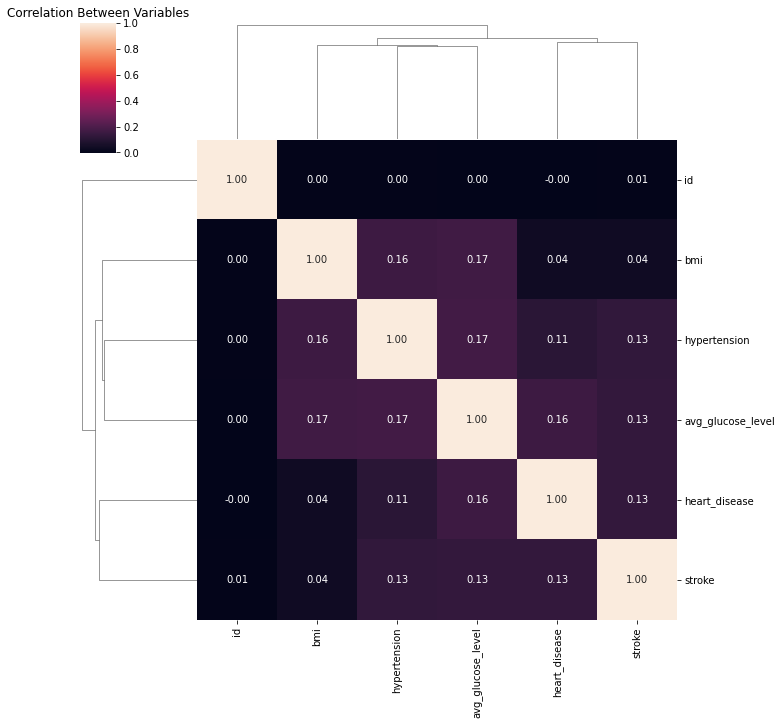

In [ ]:
corr_data = df.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Variables')
plt.show();

# PIE CHART

## Persentase Hipertensi(1) Stroke (0/1)

In [ ]:
hp = df['hypertension']==1
hyper = df[hp]
hyper

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
4,1665,1,0,174.12,24.000000,1
6,53882,1,1,70.09,27.400000,1
10,12109,1,0,80.43,29.700000,1
15,58202,1,0,167.41,30.900000,1
17,34120,1,0,221.29,25.800000,1
...,...,...,...,...,...,...
5088,22190,1,0,76.89,30.200000,0
5091,6369,1,0,95.05,30.900000,0
5093,32235,1,0,95.02,28.893237,0
5100,68398,1,0,71.97,28.300000,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
findfont: Font family ['Poppins'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Poppins'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Poppins'] not found. Falling back to DejaVu Sans.


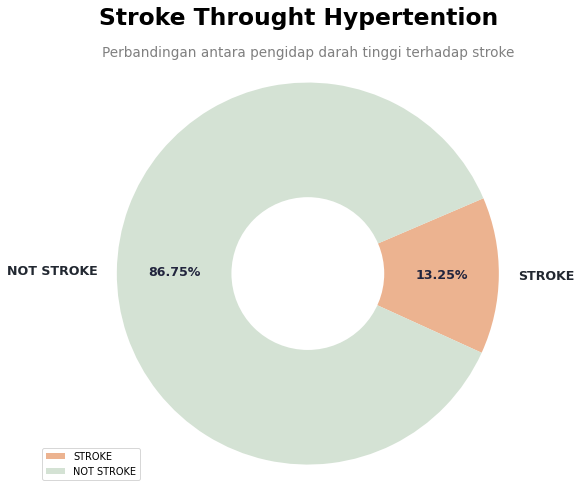

In [ ]:
#data
labels = ['STROKE', 'NOT STROKE']
sizes = [len(hyper[df.stroke == 1]),len(hyper[df.stroke == 0])]

#colors
colors = ['#ECB390', '#D4E2D4']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, startangle=-24.5, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Throught Hypertention",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
# plt.text(1, 2, 'matplotlib adalah manusia biasa, yang tak sempurna \ndan kadang salah', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, fontsize=14, fontweight = 'normal', color='#222831')
plt.title("Perbandingan antara pengidap darah tinggi terhadap stroke",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(["STROKE", "NOT STROKE"], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

In [ ]:
st=df['stroke']==1
stroke = df[st]
stroke

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,0,1,228.69,36.600000,1
1,51676,0,0,202.21,28.893237,1
2,31112,0,1,105.92,32.500000,1
3,60182,0,0,171.23,34.400000,1
4,1665,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
244,17739,0,0,84.96,36.700000,1
245,49669,0,0,57.93,30.900000,1
246,27153,0,0,78.80,29.300000,1
247,34060,1,0,87.80,28.893237,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


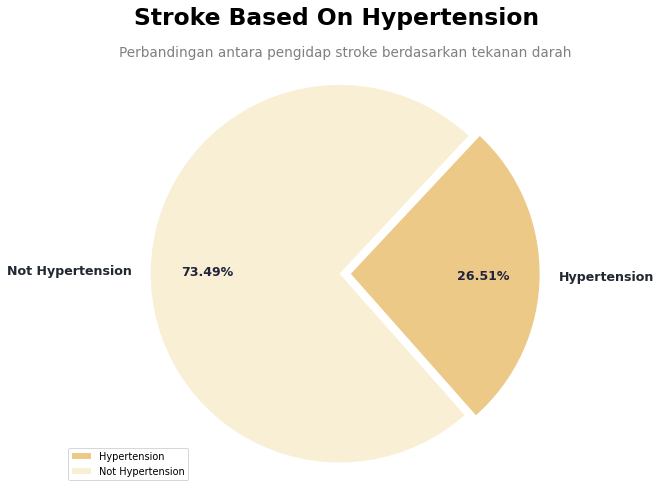

In [ ]:
#data
labels = ['Hypertension','Not Hypertension']
sizes = [len(stroke[df.hypertension == 1]),len(stroke[df.hypertension == 0])]

#colors
colors = ['#EDC988','#F8EFD4']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, explode=(0, 0.060),startangle=-48.5, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Based On Hypertension",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
# plt.text(1, 2, 'matplotlib adalah manusia biasa, yang tak sempurna \ndan kadang salah', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, fontsize=14, fontweight = 'normal', color='#222831')
plt.title("Perbandingan antara pengidap stroke berdasarkan tekanan darah",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(['Hypertension','Not Hypertension'], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
# centre_circle = plt.Circle((0,0),0.20,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

## Persentase Heart Disease(1) Stroke (0/1)

In [ ]:
hd=df['heart_disease']==1
heart = df[hd]
heart

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,0,1,228.69,36.600000,1
2,31112,0,1,105.92,32.500000,1
6,53882,1,1,70.09,27.400000,1
11,12095,0,1,120.46,36.800000,1
13,8213,0,1,219.84,28.893237,1
...,...,...,...,...,...,...
4855,42563,1,1,231.72,45.700000,0
4869,72715,0,1,193.80,26.400000,0
4921,4062,0,1,238.27,28.893237,0
4986,53697,0,1,225.35,26.500000,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


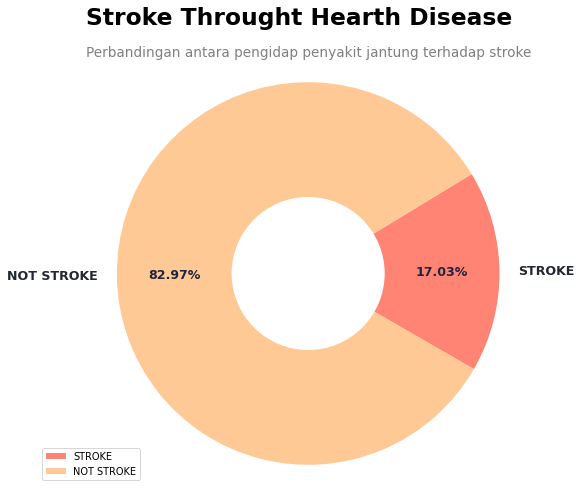

In [ ]:
#data
labels = ['STROKE', 'NOT STROKE']
sizes = [len(heart[df.stroke == 1]),len(heart[df.stroke == 0])]

#colors
colors = ['#FF8474','#FFC996']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, startangle=-30, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Throught Hearth Disease",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
plt.title("Perbandingan antara pengidap penyakit jantung terhadap stroke",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(["STROKE", "NOT STROKE"], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


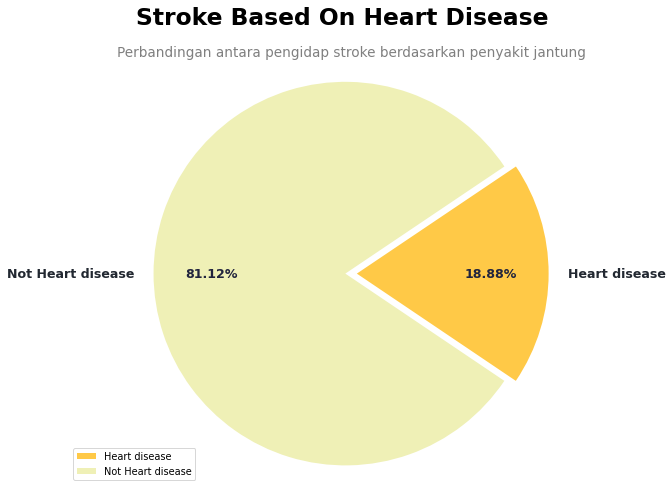

In [ ]:
#data
labels = ['Heart disease','Not Heart disease']
sizes = [len(stroke[df.heart_disease == 1]),len(stroke[df.heart_disease == 0])]

#colors
colors = ['#FFC947', '#EFF0B6']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, explode=(0, 0.060), startangle=-34, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Based On Heart Disease",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
# plt.text(1, 2, 'matplotlib adalah manusia biasa, yang tak sempurna \ndan kadang salah', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, fontsize=14, fontweight = 'normal', color='#222831')
plt.title("Perbandingan antara pengidap stroke berdasarkan penyakit jantung",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(['Heart disease','Not Heart disease'], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
# centre_circle = plt.Circle((0,0),0.20,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

# BOX PLOT

## Glucose level Stroke (1/0)

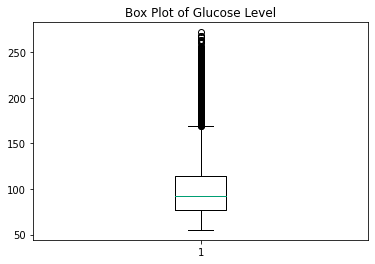

In [ ]:
box = plt.boxplot(df['avg_glucose_level'])
plt.title('Box Plot of Glucose Level')
plt.show()

In [ ]:
avg = df['avg_glucose_level']
for key in box:
    print(f'{key}: {[item.get_ydata() for item in box[key]]}\n')

whiskers: [array([77.245, 55.12 ]), array([114.09, 168.68])]

caps: [array([55.12, 55.12]), array([168.68, 168.68])]

boxes: [array([ 77.245,  77.245, 114.09 , 114.09 ,  77.245])]

medians: [array([91.885, 91.885])]

fliers: [array([228.69, 202.21, 171.23, 174.12, 186.21, 219.84, 214.09, 191.61,
       221.29, 217.08, 193.94, 233.29, 228.7 , 208.3 , 189.84, 195.23,
       211.78, 212.08, 196.92, 252.72, 219.72, 213.03, 243.58, 197.54,
       196.71, 237.75, 194.99, 180.93, 185.17, 221.58, 179.12, 228.56,
       240.09, 226.98, 235.63, 240.59, 190.32, 231.61, 191.82, 224.1 ,
       216.94, 259.63, 249.31, 219.91, 200.59, 190.14, 182.99, 206.09,
       263.32, 207.28, 194.37, 199.2 , 221.79, 239.07, 169.67, 223.83,
       231.56, 221.89, 195.71, 203.87, 185.49, 213.22, 215.94, 209.86,
       205.77, 271.74, 200.62, 242.52, 175.29, 208.65, 205.33, 210.4 ,
       199.86, 219.73, 250.89, 205.35, 216.58, 184.4 , 199.84, 218.46,
       211.06, 197.28, 233.94, 247.51, 210.95, 243.53, 205.84, 1

In [ ]:
[item.get_ydata() for item in box['boxes']]
q1 = [round(min(item.get_ydata()), 1) for item in box['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in box['boxes']]
print(f'Q1: {q1}\n'
      f'Q3: {q3}')

Q1: [77.2]
Q3: [114.1]


In [ ]:
fliers = [item.get_ydata() for item in box['fliers']]
lower_outliers = []
upper_outliers = []
for i in range(len(fliers)):
    lower_outliers_by_box = []
    upper_outliers_by_box = []
    for outlier in fliers[i]:
        if outlier < q1[i]:
            lower_outliers_by_box.append(round(outlier, 1))
        else:
            upper_outliers_by_box.append(round(outlier, 1))
    lower_outliers.append(lower_outliers_by_box)
    upper_outliers.append(upper_outliers_by_box)
print(f'Lower outliers: {lower_outliers}\n'
      f'Upper outliers: {upper_outliers}')


Lower outliers: [[]]
Upper outliers: [[228.7, 202.2, 171.2, 174.1, 186.2, 219.8, 214.1, 191.6, 221.3, 217.1, 193.9, 233.3, 228.7, 208.3, 189.8, 195.2, 211.8, 212.1, 196.9, 252.7, 219.7, 213.0, 243.6, 197.5, 196.7, 237.8, 195.0, 180.9, 185.2, 221.6, 179.1, 228.6, 240.1, 227.0, 235.6, 240.6, 190.3, 231.6, 191.8, 224.1, 216.9, 259.6, 249.3, 219.9, 200.6, 190.1, 183.0, 206.1, 263.3, 207.3, 194.4, 199.2, 221.8, 239.1, 169.7, 223.8, 231.6, 221.9, 195.7, 203.9, 185.5, 213.2, 215.9, 209.9, 205.8, 271.7, 200.6, 242.5, 175.3, 208.6, 205.3, 210.4, 199.9, 219.7, 250.9, 205.4, 216.6, 184.4, 199.8, 218.5, 211.1, 197.3, 233.9, 247.5, 211.0, 243.5, 205.8, 198.2, 206.7, 214.4, 190.7, 203.0, 242.3, 220.5, 218.5, 216.7, 234.6, 235.8, 243.5, 182.2, 229.9, 215.6, 239.6, 200.3, 205.2, 209.6, 210.8, 251.6, 213.4, 223.4, 178.3, 203.8, 205.3, 211.0, 225.5, 180.6, 227.1, 201.8, 170.0, 217.3, 196.0, 184.2, 198.7, 186.2, 183.4, 210.5, 193.8, 183.3, 247.7, 191.5, 239.8, 189.6, 207.6, 182.9, 215.6, 196.4, 188.1, 20

In [ ]:
arr = [228.7, 202.2, 171.2, 174.1, 186.2, 219.8, 214.1, 191.6, 221.3, 217.1, 193.9, 233.3, 228.7, 208.3, 189.8, 195.2, 211.8, 212.1, 196.9, 252.7, 219.7, 213.0, 243.6, 197.5, 196.7, 237.8, 195.0, 180.9, 185.2, 221.6, 179.1, 228.6, 240.1, 227.0, 235.6, 240.6, 190.3, 231.6, 191.8, 224.1, 216.9, 259.6, 249.3, 219.9, 200.6, 190.1, 183.0, 206.1, 263.3, 207.3, 194.4, 199.2, 221.8, 239.1, 169.7, 223.8, 231.6, 221.9, 195.7, 203.9, 185.5, 213.2, 215.9, 209.9, 205.8, 271.7, 200.6, 242.5, 175.3, 208.6, 205.3, 210.4, 199.9, 219.7, 250.9, 205.4, 216.6, 184.4, 199.8, 218.5, 211.1, 197.3, 233.9, 247.5, 211.0, 243.5, 205.8, 198.2, 206.7, 214.4, 190.7, 203.0, 242.3, 220.5, 218.5, 216.7, 234.6, 235.8, 243.5, 182.2, 229.9, 215.6, 239.6, 200.3, 205.2, 209.6, 210.8, 251.6, 213.4, 223.4, 178.3, 203.8, 205.3, 211.0, 225.5, 180.6, 227.1, 201.8, 170.0, 217.3, 196.0, 184.2, 198.7, 186.2, 183.4, 210.5, 193.8, 183.3, 247.7, 191.5, 239.8, 189.6, 207.6, 182.9, 215.6, 196.4, 188.1, 205.5, 204.9, 228.1, 219.5, 220.0, 214.0, 200.5, 240.7, 197.1, 194.6, 222.2, 250.2, 173.4, 184.2, 254.6, 212.0, 186.4, 189.5, 186.3, 226.7, 183.1, 194.0, 237.2, 231.2, 207.3, 207.6, 236.8, 204.6, 232.9, 195.0, 171.0, 227.9, 204.5, 206.2, 254.6, 246.3, 195.2, 223.7, 229.2, 193.2, 204.6, 251.5, 220.5, 195.0, 218.6, 211.5, 224.7, 226.1, 210.9, 230.7, 198.0, 204.2, 267.8, 217.7, 180.8, 239.5, 229.9, 211.0, 195.2, 217.4, 201.2, 197.8, 214.8, 181.2, 189.4, 206.4, 178.8, 197.6, 200.0, 205.8, 237.2, 246.5, 206.3, 207.0, 227.3, 228.7, 170.0, 244.3, 252.0, 191.8, 216.9, 222.3, 213.1, 227.5, 201.0, 210.0, 237.6, 207.4, 226.9, 253.2, 238.5, 207.8, 196.2, 231.8, 216.9, 195.0, 218.5, 183.0, 237.2, 178.3, 197.1, 242.8, 202.7, 216.9, 210.0, 208.0, 222.6, 199.1, 191.5, 200.2, 190.4, 215.9, 233.5, 213.5, 188.7, 219.5, 217.7, 227.2, 209.9, 176.5, 211.9, 225.6, 210.2, 234.8, 230.6, 224.6, 185.7, 208.2, 185.3, 203.0, 187.9, 213.9, 222.8, 198.4, 196.2, 194.5, 204.0, 199.2, 209.3, 217.1, 222.5, 187.5, 237.7, 223.4, 201.1, 208.1, 187.0, 198.2, 229.2, 209.1, 228.4, 213.0, 202.0, 206.2, 231.7, 220.0, 197.7, 199.9, 170.2, 208.8, 222.3, 220.4, 187.9, 191.7, 217.8, 226.9, 186.4, 169.5, 203.8, 170.8, 189.4, 249.3, 211.4, 206.6, 196.3, 242.9, 226.8, 185.0, 199.8, 227.8, 240.8, 239.3, 231.5, 192.4, 220.5, 196.9, 180.8, 247.5, 216.0, 219.4, 220.5, 174.0, 198.3, 191.3, 206.5, 217.0, 170.9, 232.8, 208.0, 229.6, 187.2, 227.0, 214.4, 233.7, 216.4, 266.6, 227.9, 205.0, 203.4, 243.7, 176.2, 200.3, 221.4, 213.4, 192.2, 215.7, 173.1, 202.6, 209.5, 203.2, 201.4, 206.2, 196.6, 219.9, 232.0, 216.4, 213.3, 172.3, 243.6, 169.4, 183.9, 228.0, 208.2, 199.4, 190.1, 235.5, 178.9, 227.7, 213.8, 250.8, 217.8, 217.0, 217.4, 190.9, 182.9, 255.2, 217.6, 228.0, 231.7, 196.8, 222.7, 223.6, 198.8, 192.4, 233.3, 201.4, 236.1, 193.8, 240.0, 170.9, 202.2, 181.3, 198.8, 202.6, 232.1, 203.6, 230.8, 205.0, 227.9, 216.7, 202.7, 221.8, 202.4, 215.8, 220.2, 195.6, 267.6, 176.7, 207.6, 201.6, 231.4, 220.3, 211.1, 177.9, 215.3, 212.0, 228.2, 260.8, 223.9, 169.7, 208.0, 176.8, 205.0, 191.8, 214.4, 220.6, 204.8, 248.4, 194.5, 228.9, 227.7, 226.7, 219.2, 215.9, 198.1, 240.9, 263.6, 200.1, 235.4, 207.7, 228.0, 223.1, 174.4, 214.5, 231.3, 238.8, 233.6, 188.1, 206.0, 190.9, 193.9, 214.8, 189.9, 197.1, 192.5, 199.4, 203.0, 198.3, 226.4, 236.8, 219.8, 239.2, 206.6, 216.9, 204.9, 226.8, 234.4, 200.7, 202.5, 218.0, 209.2, 202.7, 196.5, 209.5, 219.8, 205.2, 234.3, 239.2, 196.1, 176.4, 175.7, 193.4, 180.4, 219.4, 173.9, 217.9, 216.6, 174.0, 208.8, 219.7, 208.0, 185.3, 198.3, 206.7, 200.7, 218.6, 223.3, 172.3, 221.8, 218.1, 200.5, 217.8, 233.5, 181.2, 201.0, 219.7, 207.6, 248.0, 231.2, 186.5, 221.1, 212.6, 217.7, 209.0, 197.4, 222.5, 232.6, 207.4, 202.0, 213.4, 248.2, 229.9, 202.1, 253.9, 194.8, 207.8, 228.3, 203.8, 205.8, 179.7, 230.7, 216.2, 200.7, 228.5, 232.3, 200.9, 236.0, 255.0, 196.6, 189.8, 193.6, 195.7, 221.2, 192.5, 212.9, 191.9, 247.9, 229.7, 261.7, 256.7, 221.1, 208.4, 227.2, 203.3, 234.5, 190.7, 197.1, 216.1, 179.1, 203.9, 235.1, 195.4, 200.2, 223.6, 199.8, 176.4, 244.3, 223.2, 226.3, 172.9, 213.9, 212.2, 200.8, 222.6, 206.5, 232.8, 187.5, 234.1, 242.6, 174.5, 231.5, 219.8, 188.0, 234.4, 240.7, 217.6, 234.5, 182.2, 214.7, 208.7, 231.7, 206.5, 193.8, 203.0, 177.6, 198.8, 243.5, 238.3, 208.3, 176.3, 211.8, 215.7, 267.6, 215.1, 225.4, 196.3, 182.5, 212.9, 183.4, 185.3, 206.5, 253.9, 203.4, 175.9, 191.2, 223.8, 211.6, 179.4, 193.9, 174.4]
min(arr)

169.4

In [ ]:
inBox = df['avg_glucose_level']<=169.35

outBox = df['avg_glucose_level']>169.35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


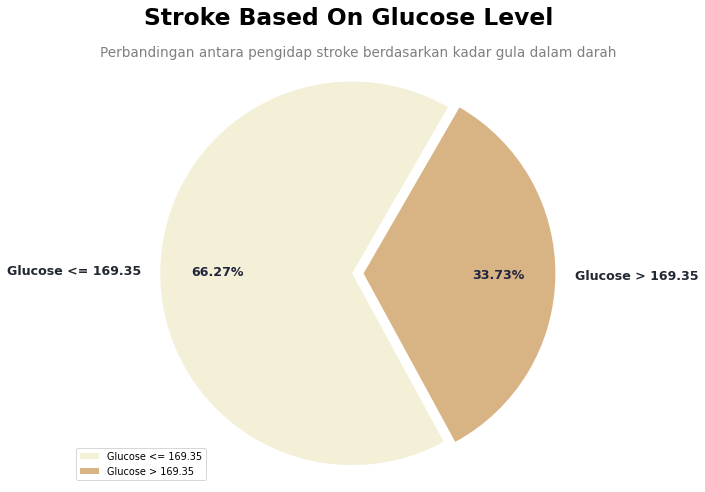

In [ ]:
#data
labels = ['Glucose <= 169.35','Glucose > 169.35']
sizes = [len(stroke[inBox]),len(stroke[outBox])]

#colors
colors = ['#F3F0D7', '#D8B384']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, explode=(0, 0.060), startangle= 60, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Based On Glucose Level",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
plt.title("Perbandingan antara pengidap stroke berdasarkan kadar gula dalam darah",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(['Glucose <= 169.35','Glucose > 169.35'], loc= 'upper center', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
# centre_circle = plt.Circle((0,0),0.20,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()

## BMI level Stroke (1/0)

In [ ]:
idx = df[ df['bmi'] == 10.3].index
df.drop(idx, inplace = True)

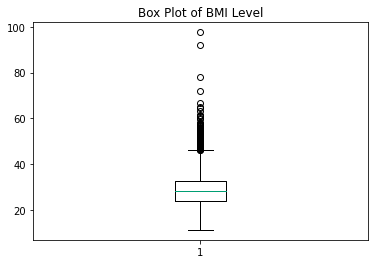

In [ ]:
cube = plt.boxplot(df['bmi'])
plt.title('Box Plot of BMI Level')
plt.show()

In [ ]:
avg = df['bmi']
for key in cube:
    print(f'{key}: {[item.get_ydata() for item in cube[key]]}\n')

whiskers: [array([23.8, 11.3]), array([32.8, 46.2])]

caps: [array([11.3, 11.3]), array([46.2, 46.2])]

boxes: [array([23.8, 23.8, 32.8, 32.8, 23.8])]

medians: [array([28.4, 28.4])]

fliers: [array([48.9, 47.5, 56.6, 50.1, 54.6, 60.9, 54.7, 48.2, 64.8, 47.3, 46.5,
       46.6, 54.7, 49.8, 60.2, 51. , 51.5, 71.9, 50.2, 47.8, 54.6, 55.7,
       55.7, 57.5, 54.2, 52.3, 50.3, 78. , 50.2, 53.4, 55.2, 48.4, 50.6,
       49.5, 55. , 54.8, 50.2, 47.5, 52.8, 66.8, 55.1, 48.5, 55.9, 57.3,
       49.8, 56. , 51.8, 57.7, 48.9, 49.3, 49.8, 54. , 56.1, 97.6, 53.9,
       49.4, 48.5, 49.2, 48.7, 48.9, 53.8, 46.5, 48.8, 52.7, 52.8, 55.7,
       53.5, 50.5, 51.9, 63.3, 52.8, 61.2, 48. , 46.8, 50.1, 48.3, 58.1,
       49.3, 50.4, 52.7, 48.3, 49.3, 51.9, 53.4, 50.3, 59.7, 47.4, 52.5,
       52.9, 54.7, 61.6, 49.9, 53.8, 47.3, 54.3, 47.9, 55. , 50.9, 50.6,
       57.2, 64.4, 92. , 50.8, 55.9, 57.9, 47.6, 55.7, 48.8, 57.2, 47.5,
       46.4, 46.9, 50.2, 47.1, 48.1, 51.7, 60.9, 47.8, 47.6, 46.3, 54.1,
    

In [ ]:
[item.get_ydata() for item in cube['boxes']]
q1 = [round(min(item.get_ydata()), 1) for item in cube['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in cube['boxes']]
print(f'Q1: {q1}\n'
      f'Q3: {q3}')

Q1: [23.8]
Q3: [32.8]


In [ ]:
fliers = [item.get_ydata() for item in cube['fliers']]
lower_outliers = []
upper_outliers = []
for i in range(len(fliers)):
    lower_outliers_by_cube = []
    upper_outliers_by_cube = []
    for outlier in fliers[i]:
        if outlier < q1[i]:
            lower_outliers_by_cube.append(round(outlier, 1))
        else:
            upper_outliers_by_cube.append(round(outlier, 1))
    lower_outliers.append(lower_outliers_by_cube)
    upper_outliers.append(upper_outliers_by_cube)
print(f'Lower outliers: {lower_outliers}\n'
      f'Upper outliers: {upper_outliers}')


Lower outliers: [[]]
Upper outliers: [[48.9, 47.5, 56.6, 50.1, 54.6, 60.9, 54.7, 48.2, 64.8, 47.3, 46.5, 46.6, 54.7, 49.8, 60.2, 51.0, 51.5, 71.9, 50.2, 47.8, 54.6, 55.7, 55.7, 57.5, 54.2, 52.3, 50.3, 78.0, 50.2, 53.4, 55.2, 48.4, 50.6, 49.5, 55.0, 54.8, 50.2, 47.5, 52.8, 66.8, 55.1, 48.5, 55.9, 57.3, 49.8, 56.0, 51.8, 57.7, 48.9, 49.3, 49.8, 54.0, 56.1, 97.6, 53.9, 49.4, 48.5, 49.2, 48.7, 48.9, 53.8, 46.5, 48.8, 52.7, 52.8, 55.7, 53.5, 50.5, 51.9, 63.3, 52.8, 61.2, 48.0, 46.8, 50.1, 48.3, 58.1, 49.3, 50.4, 52.7, 48.3, 49.3, 51.9, 53.4, 50.3, 59.7, 47.4, 52.5, 52.9, 54.7, 61.6, 49.9, 53.8, 47.3, 54.3, 47.9, 55.0, 50.9, 50.6, 57.2, 64.4, 92.0, 50.8, 55.9, 57.9, 47.6, 55.7, 48.8, 57.2, 47.5, 46.4, 46.9, 50.2, 47.1, 48.1, 51.7, 60.9, 47.8, 47.6, 46.3, 54.1, 56.6, 49.5, 47.6, 46.9]]


In [ ]:
BMIup = df['bmi'] > 46.3
BMIin= (df['bmi']<= 46.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


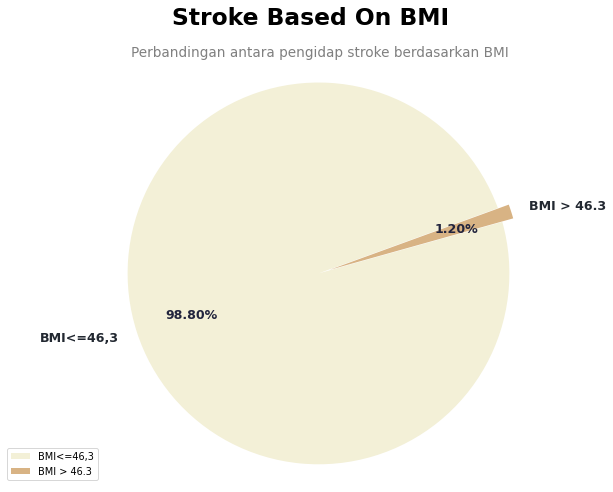

In [ ]:
#data
labels = ['BMI<=46,3','BMI > 46.3']
sizes = [len(stroke[BMIin]), len(stroke[BMIup])]

#colors
colors = ['#F3F0D7', '#D8B384']

# Set Pie chart
fig1, ax1 = plt.subplots(figsize=(10,8), dpi=70)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', pctdistance=0.70, explode=(0, 0.060), startangle= 20, 
        textprops={
        'fontsize' : 13,
        'fontweight' : 'bold',
        'fontname' : 'Poppins'})
for text in texts:
    text.set_color('#222831')
for autotext in autotexts:
    autotext.set_color('#21243D')

#tittle
plt.suptitle("Stroke Based On BMI",
           fontname='Poppins', fontsize=24, fontweight = 'bold')
plt.title("Perbandingan antara pengidap stroke berdasarkan BMI",fontname='Poppins', fontsize=14, fontweight = 'normal', color='grey')

#legend
plt.legend(['BMI<=46,3','BMI > 46.3'], loc= 'upper right', bbox_to_anchor=(0.1, 0.1), frameon=True)

#draw circle
# centre_circle = plt.Circle((0,0),0.20,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.style.use('seaborn-colorblind')
plt.show()